# Analysis of Ribo-seq read length
<font color='black'> <b>This R code is for the analysis of Ribo-seq read length of genes in all eight gropus as shown in below table. I will analyze all these groups to change in Ribo-seq read lengh changes in EMT and CX54561 treated samples. <br>
For this analysis I will use differential gene expression data and Ribo-seq read length of genes (code are available in HPC and also Evernote).</font></b>

|TGs|log2(Ctr/TGFB)|log2(TGFB/CX5461)|
|:----|:-------------|:--------------|
|1|up|up|
|2|up|down|
|3|up|Un-changed|
|4|down|up|
|5|down|down|
|6|down|Un-changed|
|7|Un-changed|up|
|8|Un-changed|down|

In [2]:
suppressMessages(suppressWarnings(source("./differential_expression_analysis.R")))
suppressMessages(suppressWarnings(source("./jupyter_common.R")))
rm(list=ls())

In [3]:
design <- read.table("blancgrp_161021_Riboseq.design.txt.gz")

In [4]:
condition <- ifelse(design$unt48==1, "unt48", ifelse(design$tgfb48==1, "tgfb48", "tgfbCX5461"))
sname <- rownames(design)
name <- paste(sname, condition, sep=".")
extra <- as.data.frame(cbind(sname, condition, name))
extra

sname,condition,name
<chr>,<chr>,<chr>
RD0175,unt48,RD0175.unt48
RD0176,unt48,RD0176.unt48
RD0177,unt48,RD0177.unt48
RD0178,tgfb48,RD0178.tgfb48
RD0179,tgfb48,RD0179.tgfb48
RD0180,tgfb48,RD0180.tgfb48
RD0184,tgfbCX5461,RD0184.tgfbCX5461
RD0185,tgfbCX5461,RD0185.tgfbCX5461
RD0186,tgfbCX5461,RD0186.tgfbCX5461


In [20]:
suppressMessages(suppressWarnings(library(data.table)))
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(dplyr)))
tbl_fread <- 
    list.files(path = "./Read_Lenth/", pattern = "*.length", full.names = TRUE) %>% 
    map_df(~fread(.))
colnames(tbl_fread) <- gsub("Name", "sname", colnames(tbl_fread))
head(tbl_fread)
dim(tbl_fread)

Gene,Counts,Length,sname
<chr>,<int>,<int>,<chr>
ENSMUST00000000001,2,18,RD0175
ENSMUST00000000001,6,19,RD0175
ENSMUST00000000001,6,20,RD0175
ENSMUST00000000001,9,21,RD0175
ENSMUST00000000001,3,22,RD0175
ENSMUST00000000001,8,23,RD0175


[1] 4141468       4

In [9]:
class(tbl_fread)
class(extra)

[1] "data.table" "data.frame"

[1] "data.frame"

In [21]:
tbl_fread <- full_join(tbl_fread, extra, by = "sname")
head(tbl_fread)
dim(tbl_fread)

Gene,Counts,Length,sname,condition,name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
ENSMUST00000000001,2,18,RD0175,unt48,RD0175.unt48
ENSMUST00000000001,6,19,RD0175,unt48,RD0175.unt48
ENSMUST00000000001,6,20,RD0175,unt48,RD0175.unt48
ENSMUST00000000001,9,21,RD0175,unt48,RD0175.unt48
ENSMUST00000000001,3,22,RD0175,unt48,RD0175.unt48
ENSMUST00000000001,8,23,RD0175,unt48,RD0175.unt48


[1] 4141468       6

In [22]:
suppressMessages(suppressWarnings(library('rtracklayer')))
my_file <- "data/mouse/Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz"
granges_gtf <- import(my_file)
head(granges_gtf)

GRanges object with 6 ranges and 22 metadata columns:
      seqnames              ranges strand |   source       type     score
         <Rle>           <IRanges>  <Rle> | <factor>   <factor> <numeric>
  [1]        1 150956201-150958296      + |   havana gene              NA
  [2]        1 150956201-150958296      + |   havana transcript        NA
  [3]        1 150956201-150958296      + |   havana exon              NA
  [4]        1 150983666-150984611      + |   havana gene              NA
  [5]        1 150983666-150984611      + |   havana transcript        NA
  [6]        1 150983666-150984611      + |   havana exon              NA
          phase            gene_id gene_version   gene_name gene_source
      <integer>        <character>  <character> <character> <character>
  [1]      <NA> ENSMUSG00000102628            2     Gm37671      havana
  [2]      <NA> ENSMUSG00000102628            2     Gm37671      havana
  [3]      <NA> ENSMUSG00000102628            2     Gm37671      h

In [23]:
GRCm39.104.gtf <- as.data.frame(granges_gtf)
GRCm39.104.selected <- GRCm39.104.gtf %>%
  rename(Chr=seqnames, ENSG=gene_id, ENST=transcript_id, mol=gene_biotype, Symbol=gene_name) %>%
  select(Chr, mol, ENSG, ENST, Symbol) %>%
  tidyr::drop_na()%>%  #filter(!is.na(ENST)) ##Both filter/is.na will work
  distinct()

In [24]:
head(GRCm39.104.selected)
class(GRCm39.104.selected)
dim(GRCm39.104.selected)

,Chr,mol,ENSG,ENST,Symbol
,<fct>,<chr>,<chr>,<chr>,<chr>
1,1,TEC,ENSMUSG00000102628,ENSMUST00000193198,Gm37671
2,1,processed_pseudogene,ENSMUSG00000100595,ENSMUST00000191430,Gm19087
3,1,processed_pseudogene,ENSMUSG00000097426,ENSMUST00000181451,Gm8941
4,1,TEC,ENSMUSG00000104478,ENSMUST00000194081,Gm38212
5,1,processed_pseudogene,ENSMUSG00000104385,ENSMUST00000194393,Gm7449
6,1,lncRNA,ENSMUSG00000086053,ENSMUST00000132100,Gm15178


[1] "data.frame"

[1] 140941      5

In [26]:
GRCm39.104.selected[GRCm39.104.selected$GeneType=="rDNA",]

Chr,mol,ENSG,Gene,Symbol
<fct>,<chr>,<chr>,<chr>,<chr>


In [27]:
colnames(GRCm39.104.selected) <- gsub("ENST","Gene", colnames(GRCm39.104.selected))
colnames(GRCm39.104.selected)

[1] "Chr"    "mol"    "ENSG"   "Gene"   "Symbol"

In [28]:
dim(tbl_fread)
tbl_fread <- left_join(tbl_fread, GRCm39.104.selected, by = "Gene")
head(tbl_fread)
dim(tbl_fread)

[1] 4141468       6

Gene,Counts,Length,sname,condition,name,Chr,mol,ENSG,Symbol
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>
ENSMUST00000000001,2,18,RD0175,unt48,RD0175.unt48,3,protein_coding,ENSMUSG00000000001,Gnai3
ENSMUST00000000001,6,19,RD0175,unt48,RD0175.unt48,3,protein_coding,ENSMUSG00000000001,Gnai3
ENSMUST00000000001,6,20,RD0175,unt48,RD0175.unt48,3,protein_coding,ENSMUSG00000000001,Gnai3
ENSMUST00000000001,9,21,RD0175,unt48,RD0175.unt48,3,protein_coding,ENSMUSG00000000001,Gnai3
ENSMUST00000000001,3,22,RD0175,unt48,RD0175.unt48,3,protein_coding,ENSMUSG00000000001,Gnai3
ENSMUST00000000001,8,23,RD0175,unt48,RD0175.unt48,3,protein_coding,ENSMUSG00000000001,Gnai3


[1] 4141468      10

In [29]:
colnames(tbl_fread)

[1] "Gene"      "Counts"    "Length"    "sname"     "condition" "name"     
 [7] "Chr"       "mol"       "ENSG"      "Symbol"

### Sum length

In [30]:
colnames(tbl_fread) <- gsub("Length", "len", colnames(tbl_fread))
colnames(tbl_fread) <- gsub("Counts", "mult", colnames(tbl_fread))
myData.raw <- tbl_fread
summ.len  <-  myData.raw  %>%  group_by(name,mol,condition,len)  %>%  summarise(count = sum(mult))
summ.len  <-  summ.len  %>%  group_by(name,mol,condition)  %>%  mutate( perc = count / sum(count)*100 , log2cpm = log2(count) - log2(sum(count)) + log2(1e6) )

### error bar
summ.len.err  <-  summ.len  %>%  group_by(mol,condition,len)  %>%  summarise( mean = mean(perc) , sd = sd(perc) , ymax = mean + sd , ymin = mean - sd )

### cdf
summ.len.cdf  <-  summ.len[ order(summ.len$len) ,]  %>%  group_by(name,mol,condition)  %>%  mutate( cdf = cumsum(perc) )
summ.len.cdf.err  <-  summ.len.cdf  %>%  group_by(mol,condition,len)  %>%  summarise( cdf.mean = mean(cdf) , cdf.sd = sd(cdf) , cdf.ymax = cdf.mean + cdf.sd , cdf.ymin = cdf.mean - cdf.sd )

# df

# by sample
summ.len  <-  as.data.frame(summ.len)
summ.len.cdf  <-  as.data.frame(summ.len.cdf)

# by mol,condition,len
summ.len.err  <-  as.data.frame(summ.len.err)
summ.len.cdf.err  <-  as.data.frame(summ.len.cdf.err)

In [15]:
summ.len.cdf.err

mol,condition,len,cdf.mean,cdf.sd,cdf.ymax,cdf.ymin
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
IG_C_gene,tgfb48,18,6.666667,NA,NA,NA
IG_C_gene,tgfb48,19,20.000000,0.00000000,20.00000,20.00000
IG_C_gene,tgfb48,20,29.166667,5.89255651,35.05922,23.27411
IG_C_gene,tgfb48,21,55.000000,7.07106781,62.07107,47.92893
IG_C_gene,tgfb48,22,40.000000,NA,NA,NA
IG_C_gene,tgfb48,27,75.000000,NA,NA,NA
IG_C_gene,tgfb48,28,73.333333,NA,NA,NA
IG_C_gene,tgfb48,29,93.333333,11.54700538,104.88034,81.78633
IG_C_gene,tgfb48,30,100.000000,NA,NA,NA


In [31]:
#### omni
verb("\t\t\tomni.\n")

sample.mat  <-  dcast( summ.len , name + mol + condition ~ len , value.var = "count" )
#sample.mat$mol <- mgsub::mgsub(as.character(sample.mat$mol), c('rRNA','tRNA','mRNA','mtRNA','Unmap'),
#                               c('rrna' , 'trna' , 'mrna' , 'mt' , 'unmap'))

head(sample.mat)
unique(sample.mat$mol)

			omni.


Warning message in dcast(summ.len, name + mol + condition ~ len, value.var = "count"):
"The dcast generic in data.table has been passed a data.frame and will attempt to redirect to the reshape2::dcast; please note that reshape2 is deprecated, and this redirection is now deprecated as well. Please do this redirection yourself like reshape2::dcast(summ.len). In the next version, this warning will become an error."


,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,RD0175.unt48,IG_V_gene,unt48,4,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,RD0175.unt48,lncRNA,unt48,21463,36351,19906,14130,9447,5665,6013,...,1234,5928,1141,348,156,123,139,57,46,19
3,RD0175.unt48,miRNA,unt48,546,658,705,480,484,329,141,...,10,6,12,9,44,35,3,NA,1,NA
4,RD0175.unt48,misc_RNA,unt48,168,435,902,562,282,271,249,...,616,247,143,79,61,47,20,16,6,6
5,RD0175.unt48,Mt_rRNA,unt48,10861,19840,21103,38273,15181,12314,10329,...,1745,1282,1235,1071,765,446,243,152,101,39
6,RD0175.unt48,Mt_tRNA,unt48,919,1222,2516,2484,2089,1845,1335,...,122,65,39,59,14,11,1,5,NA,NA


[1] "IG_V_gene"                          "lncRNA"                            
 [3] "miRNA"                              "misc_RNA"                          
 [5] "Mt_rRNA"                            "Mt_tRNA"                           
 [7] "polymorphic_pseudogene"             "processed_pseudogene"              
 [9] "protein_coding"                     "pseudogene"                        
[11] "rDNA"                               "ribozyme"                          
[13] "rRNA"                               "scaRNA"                            
[15] "snoRNA"                             "snRNA"                             
[17] "TEC"                                "TR_V_gene"                         
[19] "transcribed_processed_pseudogene"   "transcribed_unitary_pseudogene"    
[21] "transcribed_unprocessed_pseudogene" "unitary_pseudogene"                
[23] "unprocessed_pseudogene"             NA                                  
[25] "TR_C_gene"                          "IG_C_gene"                         
[27] "TR_J_gene"                          "TR_V_pseudogene"

In [32]:
myParams.colors.multimap  <-  c(yes = 'red' , no = 'grey')
myParams.fields.molType  <-  c('rrna' , 'trna' , 'mrna' , 'mt' , 'unmap')
myParams.fields.printMol  <-  c(rrna = 'rRNA' , trna = 'tRNA' , mrna = 'mRNA' ,
                                mt = 'mitochondira' , unmap = 'unmapped')
myParams.multinom.maxit  <-  2e4
outfbase <- "test/161021"

In [20]:
## This part have some error
test.res  <-  list()
test.p  <-  c()
myData.mols  <-  unique(sample.mat$mol)
myData.readLens  <-  unique(summ.len.cdf.err$len)


for (molx  in  myData.mols) {
        IRdisplay::display(molx)
        mol.mat  <-  sample.mat[ sample.mat$mol == molx ,]
        IRdisplay::display(mol.mat) 
        sample.mat.dep  <-  as.matrix(mol.mat[ , as.character(myData.readLens) ])
        sample.mat.indep  <-  mol.mat[, c("name","mol","condition")]
        sample.cond  <-  factor(sample.mat.indep$condition)
        IRdisplay::display(sample.cond)
        cond.fit  <-  nnet::multinom( sample.mat.dep ~ 1 + sample.cond , maxit = myParams.multinom.maxit )
        null.fit  <-  nnet::multinom( sample.mat.dep ~ 1 , maxit = myParams.multinom.maxit )

        the.test  <-  anova(cond.fit , null.fit)
        test.res[[molx]]  <-  the.test
        test.p[[molx]]  <-  the.test[["Pr(Chi)"]][2]

        fname  <-  sprintf("%s.%s.test.txt" , outfbase , molx )
        capture.output( summary(the.test) , file = fname )

} # molx

[1] "IG_V_gene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,RD0175.unt48,IG_V_gene,unt48,4,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
99,RD0179.tgfb48,IG_V_gene,tgfb48,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] unt48  <NA>   <NA>   <NA>   <NA>   tgfb48 <NA>   <NA>   <NA>   <NA>  
[11] <NA>  
Levels: tgfb48 unt48

# weights:  75 (48 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "lncRNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,RD0175.unt48,lncRNA,unt48,21463,36351,19906,14130,9447,5665,6013,...,1234,5928,1141,348,156,123,139,57,46,19
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
25,RD0176.unt48,lncRNA,unt48,30181,46659,26794,18917,13800,7660,8468,...,1786,10073,2032,547,285,325,364,234,184,122
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
49,RD0177.unt48,lncRNA,unt48,30783,49257,29533,21672,15102,8675,9287,...,2279,12105,2167,570,262,224,251,170,105,67
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
74,RD0178.tgfb48,lncRNA,tgfb48,18921,23635,13634,10009,7306,3911,4214,...,619,2613,462,144,90,70,99,41,23,11
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
100,RD0179.tgfb48,lncRNA,tgfb48,26399,31846,17651,13689,10132,5133,5882,...,973,4184,797,256,128,140,158,94,35,20


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 5029734.892043 
iter  10 value 4540291.354709
iter  20 value 4534223.299311
iter  30 value 4510972.020532
iter  40 value 4163757.923970
iter  50 value 4159323.104943
iter  60 value 4099370.869814
iter  70 value 4064351.694879
iter  80 value 4022863.078246
iter  90 value 4019983.201845
iter 100 value 4019884.439261
iter 110 value 4019876.146581
final  value 4019875.096932 
converged
# weights:  50 (24 variable)


[1] "miRNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,RD0175.unt48,miRNA,unt48,546,658,705,480,484,329,141,...,10,6,12,9,44,35,3,NA,1,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
26,RD0176.unt48,miRNA,unt48,774,868,941,556,604,407,157,...,5,9,14,23,73,100,NA,2,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
50,RD0177.unt48,miRNA,unt48,831,895,991,623,735,470,179,...,8,8,22,15,59,70,NA,1,1,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75,RD0178.tgfb48,miRNA,tgfb48,961,705,605,440,493,375,139,...,4,7,13,8,32,17,2,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
101,RD0179.tgfb48,miRNA,tgfb48,1311,1200,774,601,691,480,174,...,5,7,15,8,49,36,1,NA,NA,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 5029734.892043 
iter  10 value 4178020.197860
iter  20 value 4165200.695110
iter  30 value 4035246.686913
final  value 4035144.818666 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "misc_RNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,RD0175.unt48,misc_RNA,unt48,168,435,902,562,282,271,249,...,616,247,143,79,61,47,20,16,6,6
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
27,RD0176.unt48,misc_RNA,unt48,239,532,709,623,354,304,287,...,433,193,112,56,65,32,28,12,23,51
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
51,RD0177.unt48,misc_RNA,unt48,222,566,915,733,329,346,339,...,617,244,181,100,46,19,21,18,24,15
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
76,RD0178.tgfb48,misc_RNA,tgfb48,417,461,645,515,253,235,249,...,371,190,91,48,54,20,7,15,21,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
102,RD0179.tgfb48,misc_RNA,tgfb48,538,668,962,723,432,331,379,...,539,269,176,65,87,36,20,24,18,22


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 201527.377643 
iter  10 value 179198.848188
iter  20 value 178654.190350
iter  30 value 178277.834041
iter  40 value 177570.509245
iter  50 value 177032.145159
iter  60 value 176638.039168
iter  70 value 176598.810851
iter  80 value 176582.319026
final  value 176582.306331 
converged
# weights:  50 (24 variable)


[1] "Mt_rRNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,RD0175.unt48,Mt_rRNA,unt48,10861,19840,21103,38273,15181,12314,10329,...,1745,1282,1235,1071,765,446,243,152,101,39
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
28,RD0176.unt48,Mt_rRNA,unt48,15230,28574,29426,46004,19955,16009,13553,...,2329,1899,1883,1835,1460,995,728,514,396,207
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
52,RD0177.unt48,Mt_rRNA,unt48,17317,32016,33494,61529,23388,18734,15858,...,2731,2261,1902,1703,1341,873,504,379,317,163
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
77,RD0178.tgfb48,Mt_rRNA,tgfb48,21674,20678,19387,33944,13418,10483,7951,...,1014,684,646,635,532,296,164,120,83,29
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
103,RD0179.tgfb48,Mt_rRNA,tgfb48,31132,29058,27903,53049,17599,13533,10828,...,1462,1202,1064,1138,875,563,366,225,181,60


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 201527.377643 
iter  10 value 179619.328237
iter  20 value 178949.713698
iter  30 value 178231.815472
final  value 178230.254569 
converged
# weights:  100 (72 variable)
initial  value 8274580.607067 
iter  10 value 7303442.415922
iter  20 value 7293453.100543
iter  30 value 7291033.961302
iter  40 value 6892171.494307
iter  50 value 6854624.906320
iter  60 value 6810036.791515
iter  70 value 6775753.781710
iter  80 value 6731870.180055
iter  90 value 6729900.043485
iter 100 value 6729839.722151
final  value 6729838.851930 
converged
# weights:  50 (24 variable)


[1] "Mt_tRNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
6,RD0175.unt48,Mt_tRNA,unt48,919,1222,2516,2484,2089,1845,1335,...,122,65,39,59,14,11,1,5,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
29,RD0176.unt48,Mt_tRNA,unt48,1236,1808,2846,2825,2433,2019,1377,...,95,55,56,55,39,30,7,NA,3,1
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
53,RD0177.unt48,Mt_tRNA,unt48,1619,2186,3560,3443,3104,2458,1754,...,150,91,82,59,33,23,7,11,6,2
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
78,RD0178.tgfb48,Mt_tRNA,tgfb48,1650,1898,4024,4088,3988,3893,2512,...,121,57,43,31,9,12,4,NA,3,1
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
104,RD0179.tgfb48,Mt_tRNA,tgfb48,2168,2670,5329,5773,5301,5129,3428,...,151,76,67,47,21,13,9,7,4,1


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 8274580.607067 
iter  10 value 7533635.179702
iter  20 value 6969466.628960
iter  30 value 6765465.149332
iter  40 value 6759751.926709
final  value 6759687.047578 
converged
# weights:  100 (72 variable)
initial  value 270375.912661 
iter  10 value 228324.488277
iter  20 value 227341.709197
iter  30 value 224019.469839
iter  40 value 221019.229478
iter  50 value 220359.137418
iter  60 value 219454.546690
iter  70 value 219140.695968
iter  80 value 219048.648422
iter  90 value 219042.505328
final  value 219042.420825 
converged
# weights:  50 (24 variable)


[1] "polymorphic_pseudogene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
7,RD0175.unt48,polymorphic_pseudogene,unt48,NA,23,7,2,2,16,28,...,NA,1,4,NA,NA,1,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
30,RD0176.unt48,polymorphic_pseudogene,unt48,38,15,20,12,29,43,NA,...,1,NA,NA,3,NA,2,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
54,RD0177.unt48,polymorphic_pseudogene,unt48,51,26,8,43,13,18,22,...,2,3,NA,1,1,1,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
79,RD0178.tgfb48,polymorphic_pseudogene,tgfb48,24,30,23,36,6,18,8,...,NA,NA,NA,3,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
105,RD0179.tgfb48,polymorphic_pseudogene,tgfb48,37,43,34,38,2,9,23,...,NA,2,NA,NA,NA,NA,NA,NA,NA,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 270375.912661 
iter  10 value 224064.818364
iter  20 value 222198.590604
iter  30 value 220463.106280
iter  40 value 220428.561888
final  value 220428.398009 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "processed_pseudogene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
8,RD0175.unt48,processed_pseudogene,unt48,25863,48855,54245,60086,44221,35709,37184,...,572,431,498,324,320,253,161,85,127,33
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
31,RD0176.unt48,processed_pseudogene,unt48,38607,64999,71589,79436,58971,47141,46473,...,849,583,637,565,534,528,426,256,247,143
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
55,RD0177.unt48,processed_pseudogene,unt48,42342,74128,78496,88777,67076,49320,49703,...,653,667,670,577,479,387,357,157,76,84
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
80,RD0178.tgfb48,processed_pseudogene,tgfb48,33372,40010,39160,48932,33548,19334,16537,...,271,156,113,80,70,116,80,37,10,5
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
106,RD0179.tgfb48,processed_pseudogene,tgfb48,46726,52043,54887,69226,43868,27938,23782,...,345,363,248,240,155,171,117,155,49,45


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 20014770.308729 
iter  10 value 16428785.414896
iter  20 value 16403086.485057
iter  30 value 16387475.369659
iter  40 value 16308189.477181
iter  50 value 15934983.860364
iter  60 value 15912075.566604
iter  70 value 15808100.973935
iter  80 value 15652043.499089
iter  90 value 15647925.831433
iter 100 value 15647870.993544
final  value 15647868.563708 
converged
# weights:  50 (24 variable)


[1] "protein_coding"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
9,RD0175.unt48,protein_coding,unt48,181115,270331,265850,294575,225303,178220,179060,...,18671,11358,10617,10862,6288,6695,4057,2273,1374,692
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
32,RD0176.unt48,protein_coding,unt48,262257,390016,355604,389539,288688,225022,218752,...,26822,14158,12104,12394,10287,11924,7775,5378,4154,2440
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
56,RD0177.unt48,protein_coding,unt48,260415,396444,382502,421866,314297,243812,231632,...,27703,15248,12658,12843,8627,8915,5762,3377,2424,1674
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
81,RD0178.tgfb48,protein_coding,tgfb48,223801,229135,211066,257081,169846,112459,96156,...,12378,5756,4446,3848,2832,3467,1848,1120,887,493
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
107,RD0179.tgfb48,protein_coding,tgfb48,313593,326701,296266,357449,237057,155812,132338,...,19463,8542,6757,6226,4888,5698,3269,2202,1560,824


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 20014770.308729 
iter  10 value 16824624.983155
iter  20 value 16312336.982156
iter  30 value 15894149.058627
iter  40 value 15873040.348610
iter  50 value 15872697.931409
iter  50 value 15872697.925842
final  value 15872697.925842 
converged
# weights:  100 (72 variable)
initial  value 108297136.145568 
iter  10 value 92045297.791688
iter  20 value 91954614.256739
iter  30 value 91905505.445626
iter  40 value 91904684.087732
iter  50 value 91773722.468545
iter  60 value 90340451.916907
iter  70 value 90336305.155928
iter  80 value 89731920.562111
iter  90 value 89728688.055756
final  value 89728635.869601 
converged
# weights:  50 (24 variable)


[1] "pseudogene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10,RD0175.unt48,pseudogene,unt48,13,44,44,43,34,20,28,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
33,RD0176.unt48,pseudogene,unt48,28,49,39,38,24,15,36,...,NA,NA,NA,NA,NA,NA,1,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
57,RD0177.unt48,pseudogene,unt48,37,50,71,77,40,24,18,...,NA,3,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
82,RD0178.tgfb48,pseudogene,tgfb48,19,25,33,35,19,16,6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
108,RD0179.tgfb48,pseudogene,tgfb48,41,36,31,37,32,20,17,...,NA,1,NA,NA,NA,NA,NA,1,NA,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 108297136.145568 
iter  10 value 94212060.562747
iter  20 value 93676045.901272
iter  30 value 90546490.346088
iter  40 value 90507155.285186
final  value 90506885.311475 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "rDNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
11,RD0175.unt48,rDNA,unt48,6,35,18,26,30,37,41,...,5,1,2,NA,1,NA,2,1,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
34,RD0176.unt48,rDNA,unt48,29,44,25,25,43,35,36,...,3,1,NA,1,NA,3,2,NA,3,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
58,RD0177.unt48,rDNA,unt48,20,39,32,28,42,60,43,...,4,2,6,1,2,1,2,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
83,RD0178.tgfb48,rDNA,tgfb48,16,23,28,26,20,12,13,...,NA,NA,2,1,NA,NA,1,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
109,RD0179.tgfb48,rDNA,tgfb48,44,40,32,17,36,37,23,...,2,3,1,4,1,1,2,1,1,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "ribozyme"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
12,RD0175.unt48,ribozyme,unt48,163,308,269,180,246,173,90,...,30,64,42,53,38,45,37,15,7,6
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
35,RD0176.unt48,ribozyme,unt48,217,458,289,243,325,181,114,...,48,63,59,57,66,61,68,29,19,12
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
59,RD0177.unt48,ribozyme,unt48,212,527,283,259,338,169,120,...,49,58,67,32,60,54,25,14,11,9
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
84,RD0178.tgfb48,ribozyme,tgfb48,331,527,275,233,315,174,124,...,44,34,25,28,27,23,25,16,18,8
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
110,RD0179.tgfb48,ribozyme,tgfb48,484,691,351,336,406,209,144,...,66,64,54,60,52,55,55,27,15,20


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 79612.455776 
iter  10 value 73689.109845
iter  20 value 72637.413325
iter  30 value 71778.656924
iter  40 value 71285.529433
iter  50 value 71084.037816
iter  60 value 71024.405489
iter  70 value 71008.162882
iter  80 value 71003.460914
final  value 71003.327765 
converged
# weights:  50 (24 variable)


[1] "rRNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
13,RD0175.unt48,rRNA,unt48,1698834,2603103,2957266,2991733,2580336,2190836,1527757,...,979185,871498,627097,277802,283273,289874,229467,90592,77807,75738
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
36,RD0176.unt48,rRNA,unt48,2488709,3723519,3748448,3822058,3038660,2656779,1893071,...,1361808,1165859,906958,449123,515363,678969,714362,245976,275770,287659
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
60,RD0177.unt48,rRNA,unt48,2682232,4060542,4216762,4344902,3512573,2895277,2019266,...,1371790,1147386,837987,391852,454764,512537,441843,190791,180917,164039
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
85,RD0178.tgfb48,rRNA,tgfb48,2258761,2463793,3092101,2554876,1979616,1547627,1048658,...,512822,418611,278282,134189,165164,234122,260156,63310,53987,41984
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
111,RD0179.tgfb48,rRNA,tgfb48,3282678,3593546,4196765,3536161,2664782,2109942,1472920,...,817117,690881,473829,243938,312627,470652,620287,128069,110570,77722


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 79612.455776 
iter  10 value 73341.075797
iter  20 value 71735.154448
iter  30 value 71303.259021
final  value 71297.776909 
converged
# weights:  100 (72 variable)
initial  value 1113731498.922515 
iter  10 value 1052130808.542581
iter  20 value 1051708695.744372
iter  30 value 1051609202.629934
iter  40 value 1051607344.996986
iter  50 value 1034161281.884225
iter  60 value 1025104834.354076
iter  70 value 1025046733.992174
iter  80 value 1012251204.495643
iter  90 value 1012164259.262055
final  value 1012163735.146737 
converged
# weights:  50 (24 variable)


[1] "scaRNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
14,RD0175.unt48,scaRNA,unt48,2,5,2,3,3,1,1,...,2,1,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
37,RD0176.unt48,scaRNA,unt48,5,6,2,1,17,5,4,...,1,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
61,RD0177.unt48,scaRNA,unt48,NA,8,6,2,17,4,7,...,4,1,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
86,RD0178.tgfb48,scaRNA,tgfb48,2,6,1,6,17,NA,6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
112,RD0179.tgfb48,scaRNA,tgfb48,11,9,4,6,15,2,5,...,2,2,NA,NA,NA,NA,1,NA,NA,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 1113731498.922515 
iter  10 value 1029538908.600000
iter  20 value 1028654042.414531
iter  30 value 1018634053.805687
final  value 1017900669.471598 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "snoRNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
15,RD0175.unt48,snoRNA,unt48,387,465,571,502,252,131,145,...,2,20,18,9,7,1,8,26,40,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
38,RD0176.unt48,snoRNA,unt48,798,841,631,760,423,179,261,...,27,20,10,22,18,28,33,93,129,21
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
62,RD0177.unt48,snoRNA,unt48,779,839,707,604,373,285,235,...,3,25,23,11,9,3,25,47,42,25
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
87,RD0178.tgfb48,snoRNA,tgfb48,556,571,472,455,298,117,175,...,3,11,18,20,2,16,15,46,28,6
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
113,RD0179.tgfb48,snoRNA,tgfb48,823,721,537,674,286,202,265,...,17,26,7,15,13,NA,2,59,61,1


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 63936.530509 
iter  10 value 55765.755985
iter  20 value 53536.165601
iter  30 value 52518.920736
iter  40 value 52091.853842
iter  50 value 51951.975408
iter  60 value 51936.966041
final  value 51936.961349 
converged
# weights:  50 (24 variable)


[1] "snRNA"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
16,RD0175.unt48,snRNA,unt48,19595,30795,62316,14492,5165,3167,2289,...,338,273,287,224,76,91,30,68,24,49
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
39,RD0176.unt48,snRNA,unt48,27773,42005,88019,17783,5940,3899,2993,...,409,478,146,312,163,243,105,77,243,246
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
63,RD0177.unt48,snRNA,unt48,33231,43519,93043,22210,7701,5093,3735,...,461,678,270,352,128,74,127,92,71,82
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
88,RD0178.tgfb48,snRNA,tgfb48,57464,51508,67932,14731,6337,4399,2955,...,331,252,104,78,99,125,140,25,52,81
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
114,RD0179.tgfb48,snRNA,tgfb48,71409,65167,81680,20656,9313,6098,4602,...,459,463,357,289,92,137,110,99,105,60


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 63936.530509 
iter  10 value 55510.031568
iter  20 value 53511.409903
iter  30 value 52182.190477
iter  40 value 52081.855211
iter  40 value 52081.855096
iter  40 value 52081.855096
final  value 52081.855096 
converged
# weights:  100 (72 variable)
initial  value 5258210.698093 
iter  10 value 3977172.862013
iter  20 value 3948970.739918
iter  30 value 3673641.285625
iter  40 value 3585086.265724
iter  50 value 3522957.201255
iter  60 value 3399367.811654
iter  70 value 3326533.940254
iter  80 value 3253777.563613
iter  90 value 3228474.516526
iter 100 value 3228285.099557
iter 110 value 3228255.417700
iter 120 value 3228252.071037
final  value 3228251.743131 
converged
# weights:  50 (24 variable)


[1] "TEC"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
17,RD0175.unt48,TEC,unt48,14733,23731,17156,16031,15244,12621,12585,...,778,603,427,497,70,21,8,1,1,1
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
40,RD0176.unt48,TEC,unt48,16875,27054,20346,19505,18035,14024,14284,...,1150,873,544,688,155,33,13,4,2,2
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
64,RD0177.unt48,TEC,unt48,17811,28106,22259,21012,19554,14793,15157,...,1330,982,607,709,120,50,8,3,2,1
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
89,RD0178.tgfb48,TEC,tgfb48,17396,17614,10984,9247,8630,6439,6263,...,383,323,176,183,44,9,5,NA,1,1
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
115,RD0179.tgfb48,TEC,tgfb48,22972,24031,14523,12772,11857,8635,8516,...,625,457,341,324,40,11,5,4,1,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 5258210.698093 
iter  10 value 4086558.312427
iter  20 value 3338529.310821
iter  30 value 3281183.542383
iter  40 value 3274586.107607
final  value 3274555.292832 
converged
# weights:  100 (72 variable)
initial  value 2200207.849200 
iter  10 value 1855890.508375
iter  20 value 1842474.461577
iter  30 value 1838008.733649
iter  40 value 1786708.820082
iter  50 value 1771265.471629
iter  60 value 1751553.966965
iter  70 value 1751275.674240
iter  80 value 1751236.065921
iter  90 value 1751215.086578
iter 100 value 1751212.185371
final  value 1751211.569586 
converged
# weights:  50 (24 variable)


[1] "TR_V_gene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
18,RD0175.unt48,TR_V_gene,unt48,2,NA,NA,NA,1,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42,RD0176.unt48,TR_V_gene,unt48,2,NA,1,2,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
66,RD0177.unt48,TR_V_gene,unt48,1,NA,1,1,2,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
91,RD0178.tgfb48,TR_V_gene,tgfb48,2,NA,1,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
117,RD0179.tgfb48,TR_V_gene,tgfb48,2,NA,NA,1,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 2200207.849200 
iter  10 value 1949477.872106
iter  20 value 1795909.667471
iter  30 value 1761733.813794
iter  40 value 1757222.458794
iter  50 value 1757139.786470
final  value 1757139.675396 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "transcribed_processed_pseudogene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
19,RD0175.unt48,transcribed_processed_pseudogene,unt48,1932,3556,4005,4368,3409,2708,3088,...,56,50,21,15,18,24,19,4,8,3
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
43,RD0176.unt48,transcribed_processed_pseudogene,unt48,2824,4722,5420,6125,4582,3714,3900,...,55,70,77,83,92,62,56,22,27,8
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
67,RD0177.unt48,transcribed_processed_pseudogene,unt48,2999,5343,6211,6664,4982,3722,3890,...,64,67,63,32,28,41,26,18,11,12
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
92,RD0178.tgfb48,transcribed_processed_pseudogene,tgfb48,2692,3208,3237,4268,2783,1688,1576,...,27,23,7,7,6,7,1,11,2,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
118,RD0179.tgfb48,transcribed_processed_pseudogene,tgfb48,3988,4176,4454,5985,3631,2427,2288,...,32,29,39,56,6,12,4,24,6,3


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 1402860.118622 
iter  10 value 1137317.511062
iter  20 value 1129555.508726
iter  30 value 1127512.181364
iter  40 value 1108091.110770
iter  50 value 1101745.411442
iter  60 value 1098643.165766
iter  70 value 1096903.097000
iter  80 value 1096153.236124
iter  90 value 1095834.453172
iter 100 value 1095808.821527
iter 110 value 1095806.817770
iter 110 value 1095806.808195
iter 110 value 1095806.808107
final  value 1095806.808107 
converged
# weights:  50 (24 variable)


[1] "transcribed_unitary_pseudogene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
20,RD0175.unt48,transcribed_unitary_pseudogene,unt48,14,27,12,16,12,NA,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
44,RD0176.unt48,transcribed_unitary_pseudogene,unt48,13,8,14,36,16,12,6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
68,RD0177.unt48,transcribed_unitary_pseudogene,unt48,2,8,14,18,10,4,4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,RD0178.tgfb48,transcribed_unitary_pseudogene,tgfb48,5,5,17,15,8,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
119,RD0179.tgfb48,transcribed_unitary_pseudogene,tgfb48,7,15,24,18,2,6,8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 1402860.118622 
iter  10 value 1141273.299424
iter  20 value 1119713.560402
iter  30 value 1112674.064802
iter  40 value 1112362.940791
final  value 1112362.748158 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "transcribed_unprocessed_pseudogene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
21,RD0175.unt48,transcribed_unprocessed_pseudogene,unt48,13477,12975,2837,459,376,82,106,...,2,NA,2,1,1,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
45,RD0176.unt48,transcribed_unprocessed_pseudogene,unt48,11891,12021,2173,545,361,138,91,...,5,2,1,NA,1,1,2,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
69,RD0177.unt48,transcribed_unprocessed_pseudogene,unt48,12379,12285,2626,557,356,150,113,...,NA,1,2,1,NA,NA,NA,NA,NA,2
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,RD0178.tgfb48,transcribed_unprocessed_pseudogene,tgfb48,13033,12684,1832,356,220,63,43,...,NA,3,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
120,RD0179.tgfb48,transcribed_unprocessed_pseudogene,tgfb48,15545,14671,2021,457,277,67,70,...,NA,1,NA,NA,1,1,NA,NA,NA,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "unitary_pseudogene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
22,RD0175.unt48,unitary_pseudogene,unt48,NA,1,NA,1,NA,1,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
46,RD0176.unt48,unitary_pseudogene,unt48,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
70,RD0177.unt48,unitary_pseudogene,unt48,1,NA,NA,2,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,RD0178.tgfb48,unitary_pseudogene,tgfb48,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
121,RD0179.tgfb48,unitary_pseudogene,tgfb48,1,NA,NA,NA,NA,1,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       <NA>       <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] "unprocessed_pseudogene"

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
23,RD0175.unt48,unprocessed_pseudogene,unt48,664,1192,1275,1199,1008,810,1057,...,37,13,6,13,3,1,NA,2,4,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
47,RD0176.unt48,unprocessed_pseudogene,unt48,828,1389,1629,1699,1281,989,1135,...,58,29,14,6,NA,1,6,9,4,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
71,RD0177.unt48,unprocessed_pseudogene,unt48,860,1684,1781,1612,1247,1274,1088,...,42,36,14,3,3,4,5,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,RD0178.tgfb48,unprocessed_pseudogene,tgfb48,1381,1337,1231,1366,915,584,513,...,52,29,14,9,4,NA,3,NA,2,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
122,RD0179.tgfb48,unprocessed_pseudogene,tgfb48,1719,1656,1693,1903,1171,818,748,...,63,50,24,6,1,1,NA,4,6,1


[1] unt48      <NA>       unt48      <NA>       unt48      <NA>      
 [7] tgfb48     <NA>       tgfb48     <NA>       tgfb48     <NA>      
[13] tgfbCX5461 <NA>       tgfbCX5461 <NA>       tgfbCX5461 <NA>      
Levels: tgfb48 tgfbCX5461 unt48

initial  value 0.000000 
final  value 0.000000 
converged
# weights:  100 (72 variable)
initial  value 0.000000 
final  value 0.000000 
converged
# weights:  50 (24 variable)


[1] NA

,name,mol,condition,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [16] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [31] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [46] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [61] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [76] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [91] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[106] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[121] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[136] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[151] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[166] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[181] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[196] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[211] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
Levels:

initial  value 0.000000 
final  value 0.000000 
converged


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


	protein_coding


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
513,protein_coding,tgfb48,18,10.106859,0.19877172,10.305631,9.908087
514,protein_coding,tgfb48,19,10.233133,0.43249536,10.665628,9.800637
515,protein_coding,tgfb48,20,9.412740,0.26657487,9.679315,9.146165
516,protein_coding,tgfb48,21,11.463220,0.22131324,11.684533,11.241907
517,protein_coding,tgfb48,22,7.591439,0.15535675,7.746796,7.436083
518,protein_coding,tgfb48,23,5.000242,0.09571402,5.095957,4.904528


		unt48
		tgfb48
		tgfbCX5461


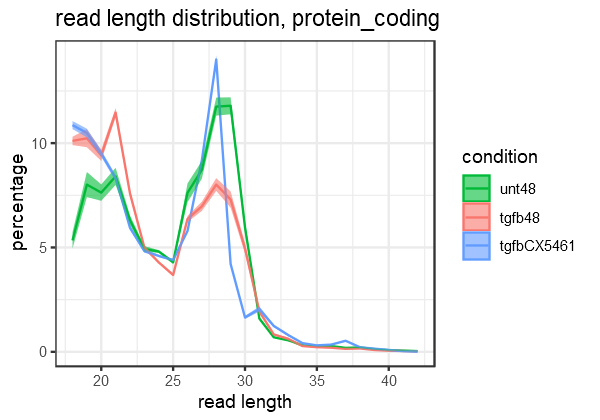

In [33]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "protein_coding"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx

	lncRNA


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
13,lncRNA,tgfb48,18,17.253439,0.27345521,17.526894,16.979984
14,lncRNA,tgfb48,19,21.157562,0.26423039,21.421792,20.893331
15,lncRNA,tgfb48,20,11.934434,0.35755687,12.291991,11.576878
16,lncRNA,tgfb48,21,9.052217,0.06336147,9.115579,8.988856
17,lncRNA,tgfb48,22,6.604544,0.14361639,6.748161,6.460928
18,lncRNA,tgfb48,23,3.476471,0.06322140,3.539692,3.413249


		unt48
		tgfb48
		tgfbCX5461


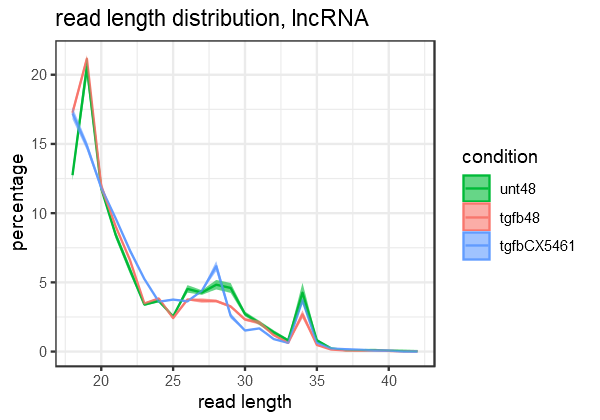

In [34]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "lncRNA"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx

	rRNA


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
785,rRNA,tgfb48,18,8.827048,0.14553127,8.972579,8.681517
786,rRNA,tgfb48,19,9.665197,0.17436468,9.839562,9.490832
787,rRNA,tgfb48,20,11.625892,0.24268512,11.868577,11.383207
788,rRNA,tgfb48,21,9.718241,0.10515824,9.823399,9.613082
789,rRNA,tgfb48,22,7.456371,0.16462213,7.620993,7.291749
790,rRNA,tgfb48,23,5.868162,0.09221624,5.960378,5.775946


		unt48
		tgfb48
		tgfbCX5461


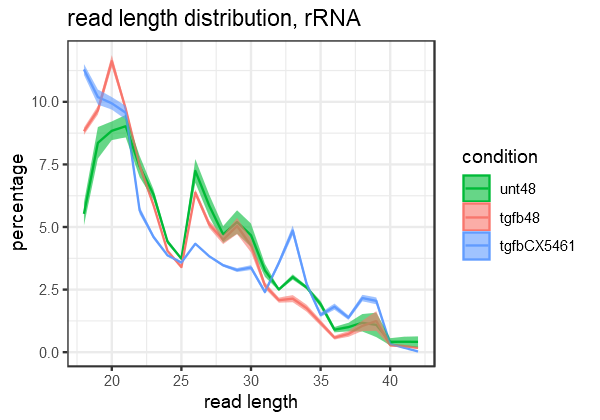

In [23]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "rRNA"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx

	rDNA


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
641,rDNA,tgfb48,18,7.780507,2.226342,10.006850,5.554165
642,rDNA,tgfb48,19,7.352142,2.413893,9.766035,4.938249
643,rDNA,tgfb48,20,8.067155,1.695935,9.763090,6.371221
644,rDNA,tgfb48,21,7.044093,2.791705,9.835798,4.252389
645,rDNA,tgfb48,22,7.128308,1.173965,8.302273,5.954343
646,rDNA,tgfb48,23,6.252732,2.136272,8.389005,4.116460


		unt48
		tgfb48
		tgfbCX5461


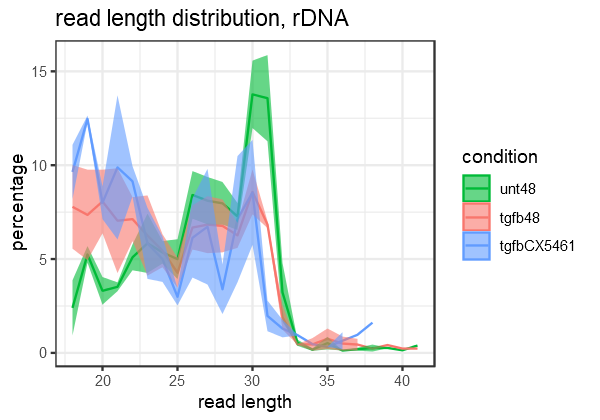

In [24]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "rDNA"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx

	ribozyme


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
710,ribozyme,tgfb48,18,10.456937,0.8090688,11.266006,9.647868
711,ribozyme,tgfb48,19,14.233648,1.5982614,15.831909,12.635386
712,ribozyme,tgfb48,20,7.710333,0.2619288,7.972262,7.448405
713,ribozyme,tgfb48,21,6.741395,0.5508700,7.292265,6.190525
714,ribozyme,tgfb48,22,8.631901,0.6324208,9.264321,7.999480
715,ribozyme,tgfb48,23,5.159341,0.6884262,5.847768,4.470915


		unt48
		tgfb48
		tgfbCX5461


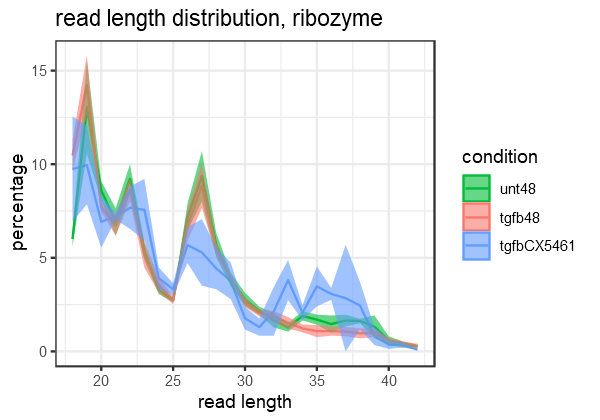

In [25]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "ribozyme"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx

	pseudogene


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
588,pseudogene,tgfb48,18,9.748028,2.4700931,12.218121,7.277935
589,pseudogene,tgfb48,19,11.003384,0.4364278,11.439812,10.566957
590,pseudogene,tgfb48,20,11.963333,2.2484026,14.211736,9.714931
591,pseudogene,tgfb48,21,13.088805,1.7099089,14.798714,11.378896
592,pseudogene,tgfb48,22,8.020401,1.7937912,9.814192,6.226610
593,pseudogene,tgfb48,23,5.448744,1.7494564,7.198200,3.699287


		unt48
		tgfb48
		tgfbCX5461


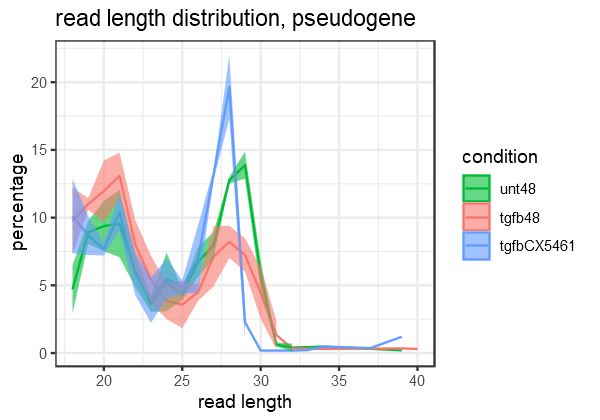

In [26]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "pseudogene"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx

	snoRNA


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
905,snoRNA,tgfb48,18,15.899633,1.6654647,17.565098,14.234168
906,snoRNA,tgfb48,19,15.232945,1.0740875,16.307033,14.158858
907,snoRNA,tgfb48,20,12.263228,0.9868347,13.250063,11.276394
908,snoRNA,tgfb48,21,14.121525,1.1009205,15.222445,13.020604
909,snoRNA,tgfb48,22,7.312651,1.1608116,8.473462,6.151839
910,snoRNA,tgfb48,23,4.529076,1.3251874,5.854263,3.203889


		unt48
		tgfb48
		tgfbCX5461


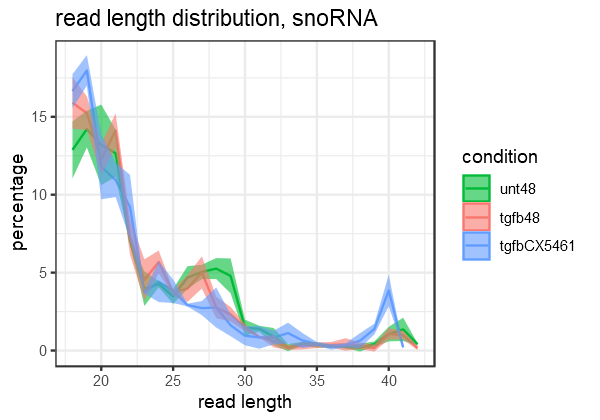

In [27]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "snoRNA"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx

	snRNA


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
979,snRNA,tgfb48,18,25.116935,1.02943663,26.146371,24.087498
980,snRNA,tgfb48,19,21.962009,0.39422351,22.356232,21.567785
981,snRNA,tgfb48,20,28.095711,1.04794192,29.143653,27.047769
982,snRNA,tgfb48,21,6.590940,0.38653783,6.977478,6.204402
983,snRNA,tgfb48,22,3.010936,0.24516349,3.256100,2.765773
984,snRNA,tgfb48,23,2.000010,0.09474555,2.094755,1.905264


		unt48
		tgfb48
		tgfbCX5461


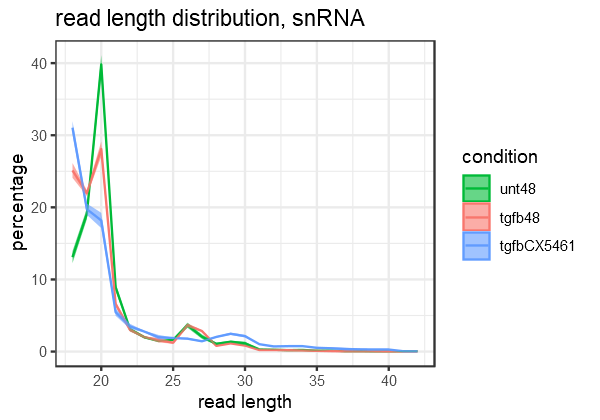

In [28]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "snRNA"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx

	processed_pseudogene


,mol,condition,len,mean,sd,ymax,ymin
,<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
438,processed_pseudogene,tgfb48,18,9.002886,0.29562464,9.298511,8.707262
439,processed_pseudogene,tgfb48,19,10.133725,0.26572862,10.399453,9.867996
440,processed_pseudogene,tgfb48,20,10.359823,0.29563822,10.655461,10.064184
441,processed_pseudogene,tgfb48,21,13.153906,0.40239571,13.556302,12.751511
442,processed_pseudogene,tgfb48,22,8.610150,0.09049713,8.700647,8.519653
443,processed_pseudogene,tgfb48,23,5.214992,0.21491524,5.429907,5.000077


		unt48
		tgfb48
		tgfbCX5461


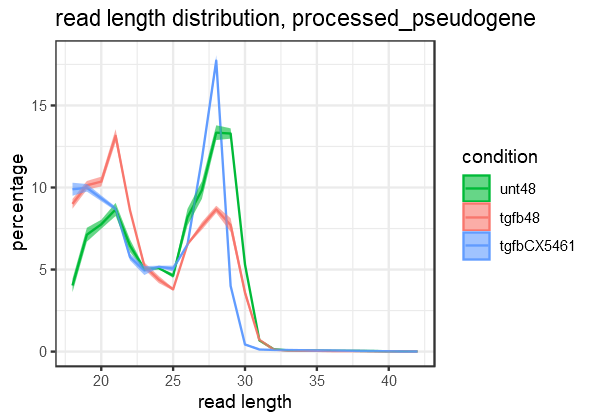

In [29]:
summ.len.err$condition <- as.factor(summ.len.err$condition)
summ.len.err$condition <- ordered(summ.len.err$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ### same order as Hyunsoo Kim
splmol <- split(summ.len.err, summ.len.err$mol)
molx <- "processed_pseudogene"
                                    
    verb("\t%s\n", molx)
    subdf <- splmol[[molx]]
    head(subdf)
    #subdf$condition <- ordered(subdf$condition, levels =c("unt48", "tgfb48", "tgfbCX5461")) ## same order as Hyunsoo Kim
    gp <- ggplot(data = subdf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, color = condition, 
        fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, aes(linetype = NA)) + 
        scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + scale_fill_manual(values = c("#00BA38", 
        "#F8766D", "#619CFF")) + theme_bw() + xlab("read length") + ylab("percentage") + 
        ggtitle(sprintf("read length distribution, %s", molx))
    
    print_figure(gp, width = 5, height = 3.5, file = sprintf("read_length_dist_by_nucleic_acid_ribbon_%s", 
        molx))
    
    
    splcond <- split(splmol[[molx]], splmol[[molx]]$condition)
    for (condx in names(splcond)) {
        verb("\t\t%s\n", condx)
        
        condf <- splcond[[condx]]
                
        gp <- ggplot(data = condf, aes(x = len, y = mean, ymin = ymin, ymax = ymax, 
            color = condition, fill = condition)) + geom_line() + geom_ribbon(alpha = 0.6, 
            aes(linetype = NA)) + scale_color_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            scale_fill_manual(values = c("#00BA38", "#F8766D", "#619CFF")) + 
            theme_bw() + # scale_fill_discrete( drop = FALSE ) + scale_colour_discrete( drop = FALSE ) +
        ggtitle(sprintf("read length distribution, %s  %s", molx, condx))
        # print_figure(gp, width=6, height=4,
        # file=sprintf('read_length_dist_by_nucleic_acid_ribbon_%s_%s', molx, condx))
    }  # condx